# Learning linear conservative system using a symplectic neural network

In this notebook we will use a structure-preserving neural network to learn a function $\phi:\mathbb{R}^n\rightarrow\mathbb{R}^n$ from a data of the form $\{x_i, \phi(x_i)\}_{i=1}^m$, where the $x_i$ are generated randomly. 

We know that the unknown function $\phi$ is the solution of linear conservative ODE $\dot{x} = JMx$, where $J=-J^T$ is a symplectic matrix and $M=M^T$ is a symmetric matrix. 

In [1]:
from utils import create_gif, generate_linear_hamiltonian_data, generate_linear_hamiltonian_trajectory
import torch 

torch.set_default_dtype(torch.float64)
torch.manual_seed(0)

# Generate a dataset of exact solutions of a linear Hamiltonian system
DIM = 100
TIMESTEP = torch.tensor([0.05])
NDATA = 1000

x0, x1 = generate_linear_hamiltonian_data(
    dim=DIM, 
    ndata=NDATA, 
    timestep=TIMESTEP,
)

AttributeError: module 'numpy' has no attribute 'matrix_exp'

### Initialize the Hamiltonian neural network (P-SympNet) using the StruPNET package

In [ ]:
from strupnet import SympNet

sympnet = SympNet(
    dim=DIM,
    max_degree=2,
    layers=2*DIM,
    method='P',
)

### Train the Hamiltonian neural network using the Adams optimiser

In [ ]:
from utils import train

NEPOCHS = 3000
LEARNING_RATE = 0.1
TOL = 1e-14

training_curve = train(
    net=sympnet,
    x0=x0,
    x1=x1,
    lr=LEARNING_RATE,
    nepochs=NEPOCHS,
    tol=TOL
)

plt.semilogy(training_curve)

/Users/bentapley/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch:  0  Loss:  0.002902654270579404
Epoch:  100  Loss:  5.176990424519795e-07
Epoch:  200  Loss:  6.149335119651967e-09
Epoch:  300  Loss:  8.412570623723426e-10
Epoch:  400  Loss:  5.69871408128806e-09
Epoch:  500  Loss:  3.2793710283099733e-10
Epoch:  600  Loss:  4.280190413534471e-12
Epoch:  700  Loss:  6.194978296956278e-06
Epoch:  800  Loss:  1.2434825116172934e-10
Epoch:  900  Loss:  9.241123695737955e-13
Epoch:  1000  Loss:  4.935190706590697e-13
Epoch:  1100  Loss:  3.614401367237066e-13


KeyboardInterrupt: 

### Compare the prediction with the true solution

GIF saved as prediction.gif


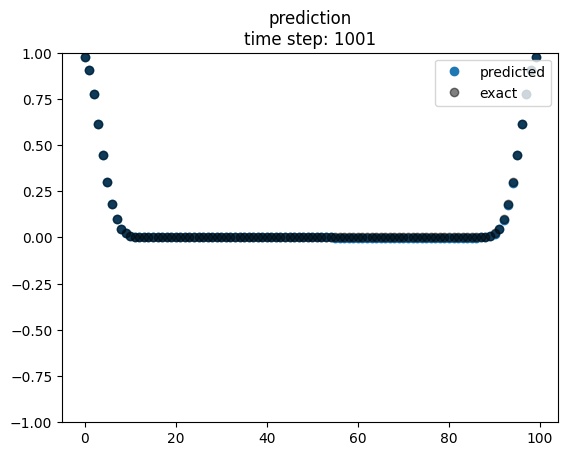

In [ ]:
NSTEPS = 1000


z = torch.linspace(-1, 1, DIM)
p0, q0 = torch.zeros(DIM), torch.exp(-z**2*100)

true_sol = generate_linear_hamiltonian_trajectory(p0, q0, TIMESTEP, NSTEPS)

# get predicted solution
pred_sol = torch.zeros(NSTEPS + 1, 2*DIM)
pred_sol[0, :] = true_sol[0, :]
for i in range(NSTEPS):
    pred_sol[i+1, :] = sympnet(x=pred_sol[i, :], dt=TIMESTEP).detach()

create_gif(pred_sol[:, DIM:], exact_solution=true_sol[:, DIM:], title='prediction', duration=0.00001)
